<a href="https://colab.research.google.com/github/Mukeshreddy3699/Mukesh_INFO5731/blob/main/Pappula_Mukesh_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

Narrator_names = []
Narrator_descr = []

for i in range(1,977):
  i=str(i)
  url = "https://ddr.densho.org/narrators/" + i
  headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'}
  page = requests.get(url, headers=headers)
  soup = BeautifulSoup(page.text, 'html.parser')

  Narrators = soup.find_all('div', class_='col-sm-8 col-md-8')
  for Narrator in Narrators:
      Narrator_names.append(Narrator.h1.text.strip())
      Narrator_descr.append(Narrator.p.text.strip())

Narrator_dic = {"Narrators" : Narrator_names, "Description" : Narrator_descr}
df = pd.DataFrame(Narrator_dic)
df.to_csv('Narrators.csv', index=False)
print('File genarted and reviews saved..!')


File genarted and reviews saved..!


In [28]:
data_url="https://github.com/Mukeshreddy3699/Mukesh_INFO5731/blob/main/Narrators.csv"
df = pd.read_table(data_url)
df

,<!DOCTYPE html>
0,<html
1,"lang=""en"""
2,"data-color-mode=""auto"" data-light-theme=""lig..."
3,"data-a11y-animated-images=""system"" data-a11y..."
4,>
...,...
2070,</div>
2071,"<div id=""js-global-screen-reader-notice"" c..."
2072,"<div id=""js-global-screen-reader-notice-as..."
2073,</body>


In [2]:
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.util import ngrams
from collections import Counter

nltk.download('all')
def read_reviews(csv_filename='Narrators.csv'):
    try:
        return pd.read_csv(csv_filename)
    except Exception as e:
        print(f"Failed to read reviews from CSV: {e}")
        return None
def tokenize_and_pos_tag(text):
    return pos_tag(word_tokenize(text))

def generate_and_count_ngrams(tokens, n):
    return Counter(ngrams(tokens, n))

reviews = read_reviews()
tokens_and_tags = tokenize_and_pos_tag(reviews['Description'][0])
bigram_counts = generate_and_count_ngrams(tokens_and_tags, 2)

print("Tokens and POS Tags:", tokens_and_tags)
print("Bigram Counts:", bigram_counts)

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

Tokens and POS Tags: [('Nisei', 'NNP'), ('male', 'NN'), ('.', '.'), ('Born', 'NNP'), ('September', 'NNP'), ('23', 'CD'), (',', ','), ('1925', 'CD'), (',', ','), ('in', 'IN'), ('Seattle', 'NNP'), (',', ','), ('Washington', 'NNP'), ('.', '.'), ('Spent', 'NNP'), ('prewar', 'JJ'), ('childhood', 'NN'), ('in', 'IN'), ('Seattle', 'NNP'), ("'s", 'POS'), ('Nihonmachi', 'NNP'), ('.', '.'), ('Incarcerated', 'VBN'), ('at', 'IN'), ('Puyallup', 'NNP'), ('Assembly', 'NNP'), ('Center', 'NNP'), (',', ','), ('Washington', 'NNP'), (',', ','), ('and', 'CC'), ('Minidoka', 'NNP'), ('concentration', 'NN'), ('camp', 'NN'), (',', ','), ('Idaho', 'NNP'), ('.', '.'), ('Refused', 'VBD'), ('to', 'TO'), ('participate', 'VB'), ('in', 'IN'), ('the', 'DT'), ('draft', 'NN'), ('and', 'CC'), ('was', 'VBD'), ('imprisoned', 'VBN'), ('at', 'IN'), ('McNeil', 'NNP'), ('Island', 'NNP'), ('Penitentiary', 'NNP'), (',', ','), ('Washington', 'NNP'), (',', ','), ('for', 'IN'), ('draft', 'NN'), ('resistance', 'NN'), ('.', '.'), ('Re

In [6]:
import nltk
from nltk.util import ngrams
from collections import Counter

def count_ngrams(texts, n):
    ngram_freq = Counter()
    for text in texts:
        tokens = nltk.word_tokenize(text)
        ngram_freq.update(ngrams(tokens, n))
    return ngram_freq


n = int(input("Enter the value of n for n-grams: "))
subset_reviews = reviews.head(100)['Description']
# Count the frequency of N-grams
ngram_frequency = count_ngrams(subset_reviews, n)
# Display the top 20 most frequent N-grams
print(f"Frequency of all the {n}-grams:")
print(ngram_frequency.most_common(20))


Enter the value of n for n-grams: 3
Frequency of all the 3-grams:
[(('concentration', 'camp', ','), 75), ((',', 'Washington', '.'), 72), (('male', '.', 'Born'), 51), (('in', 'Seattle', ','), 45), (('World', 'War', 'II'), 45), (('Seattle', ',', 'Washington'), 44), ((',', 'California', '.'), 42), (('Assembly', 'Center', ','), 40), (('Nisei', 'male', '.'), 39), (('.', 'Incarcerated', 'at'), 37), (('Minidoka', 'concentration', 'camp'), 35), (('camp', ',', 'Idaho'), 35), (('female', '.', 'Born'), 34), ((',', 'Washington', ','), 32), ((',', 'Idaho', '.'), 29), (('Nisei', 'female', '.'), 29), (('Puyallup', 'Assembly', 'Center'), 28), (('and', 'Minidoka', 'concentration'), 28), (('Incarcerated', 'at', 'the'), 26), (('camp', ',', 'California'), 26)]


In [20]:
import numpy as np
# Replace NaN values with empty strings
df['Description'] = df['Description'].fillna('')
# Tokenize text and count bigrams
bigram_freq = Counter()
for text in df['Description']:
    tokens = word_tokenize(str(text).lower())
    bigrams = list(nltk.ngrams(tokens, 2))
    bigram_freq.update(bigrams)

# Calculate and display the probabilities for all bigrams
print("(2) Probabilities for all the bigrams:")
for bigram, freq in bigram_freq.items():
    word2, word1 = bigram
    word2_count = tokens.count(word2)
    if word2_count != 0:
        print(f"{bigram}: {freq / word2_count:.2f}")


(2) Probabilities for all the bigrams:


In [21]:
import numpy as np

# Replace NaN values with empty strings
df['Description'] = df['Description'].fillna('')

all_noun_phrases = [] #empty List
for text in df['Description']:
    if text.strip():
        tokens = nltk.word_tokenize(str(text).lower())  # Convert to string before lowercasing
        pos_tags = nltk.pos_tag(tokens)
        grammar = "NP: {<DT>?<JJ>*<NN>}"
        cp = nltk.RegexpParser(grammar)
        tree = cp.parse(pos_tags)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                noun_phrase = ' '.join(word for word, tag in subtree.leaves())
                all_noun_phrases.append(noun_phrase)

# Count frequencies of noun phrases
noun_phrase_freq = Counter(all_noun_phrases)

# Calculate relative probabilities of each review in terms of other reviews
max_freq = max(noun_phrase_freq.values())
relative_probabilities = {}
for text in df['Description']:
    if text.strip():  # Check if text is not empty
        tokens = nltk.word_tokenize(str(text).lower())
        review_noun_phrases = [noun_phrase for noun_phrase in all_noun_phrases if noun_phrase in tokens]
        review_freq = Counter(review_noun_phrases)
        review_relative_prob = {noun_phrase: freq / max_freq for noun_phrase, freq in review_freq.items()}
        relative_probabilities[text] = review_relative_prob

# Display the result in a table
noun_phrases = list(noun_phrase_freq.keys())
df_result = pd.DataFrame(index=df['Description'], columns=noun_phrases)
for review, probabilities in relative_probabilities.items():
    for noun_phrase in noun_phrases:
        df_result.at[review, noun_phrase] = probabilities.get(noun_phrase, 0)

print("\n(3) Relative probabilities of each review in terms of other reviews:")
print(df_result)


ValueError: max() arg is an empty sequence

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [30]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

reviews = pd.read_csv('Narrators.csv')
reviews['Description'] = reviews['Description'].fillna('')
#tokenization
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
def clean_text(text):
    cleaned_text = re.sub(r'http\S+|[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(cleaned_text.lower())
    cleaned_tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and len(token) > 1]
    return ' '.join(cleaned_tokens)

reviews['clean_text'] = reviews['Description'].apply(clean_text)

def generate_tfidf_matrix(texts):
    return TfidfVectorizer().fit_transform(texts)

# Generate TF-IDF matrix
tfidf_m = generate_tfidf_matrix(reviews['clean_text'])
print("TF-IDF Matrix:")
print(pd.DataFrame(tfidf_m.toarray()))


TF-IDF Matrix:
     0     1     2     3     4         5     6     7     8     9     ...  \
0     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
1     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
2     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
3     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
4     0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
..    ...   ...   ...   ...   ...       ...   ...   ...   ...   ...  ...   
919   0.0   0.0   0.0   0.0   0.0  0.277501   0.0   0.0   0.0   0.0  ...   
920   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
921   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
922   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   
923   0.0   0.0   0.0   0.0   0.0  0.000000   0.0   0.0   0.0   0.0  ...   

     4083  4084  4085  4086  4087  4088  4089  4090  4091  4092  
0     

In [31]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
def create_tfidf_matrix(texts):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    return tfidf_matrix, vectorizer
def calculate_similarity(query_vector, document_matrix):
    return cosine_similarity(query_vector, document_matrix)
def rd(cosine_similarities):
    return sorted(enumerate(cosine_similarities[0]), key=lambda x: x[1], reverse=True)
def drd(ranked_documents, reviews):
    print("Ranked Documents based on Similarity to the Query:")
    for idx, similarity in ranked_documents:
        print(f"Document {idx + 1}: Similarity = {similarity:.4f}\nNarrator Review: {reviews[idx]}\n{'-' * 50}")
reviews = pd.read_csv('Narrators.csv')
subset_reviews = reviews['Description'][:100]
# Create TF-IDF matrix and vectorizer
tfidf_matrix, vectorizer = create_tfidf_matrix(subset_reviews)
query = "Experiences of Nisei males during World War II incarceration and draft resistance in the United States"
query_tfidf_vector = vectorizer.transform([query])
cos_similarities = calculate_similarity(query_tfidf_vector, tfidf_matrix)
drd(rd(cos_similarities), subset_reviews)

Ranked Documents based on Similarity to the Query:
Document 1: Similarity = 0.3288
Narrator Review: Nisei male. Born September 23, 1925, in Seattle, Washington. Spent prewar childhood in Seattle's Nihonmachi. Incarcerated at Puyallup Assembly Center, Washington, and Minidoka concentration camp, Idaho. Refused to participate in the draft and was imprisoned at McNeil Island Penitentiary, Washington, for draft resistance. Resettled in Seattle.
--------------------------------------------------
Document 74: Similarity = 0.2353
Narrator Review: Nisei female. Born February 8, 1920, in South Park, Washington. During World War II, incarcerated at the Puyallup Assembly Center, Washington, and Minidoka concentration camp, Idaho. Resettled during the war to Salt Lake City, Utah, and returned to Seattle after the end of World War II.
--------------------------------------------------
Document 67: Similarity = 0.2191
Narrator Review: Kibei female. Born 1927 in Spokane, Washington. Went to Japan at 

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

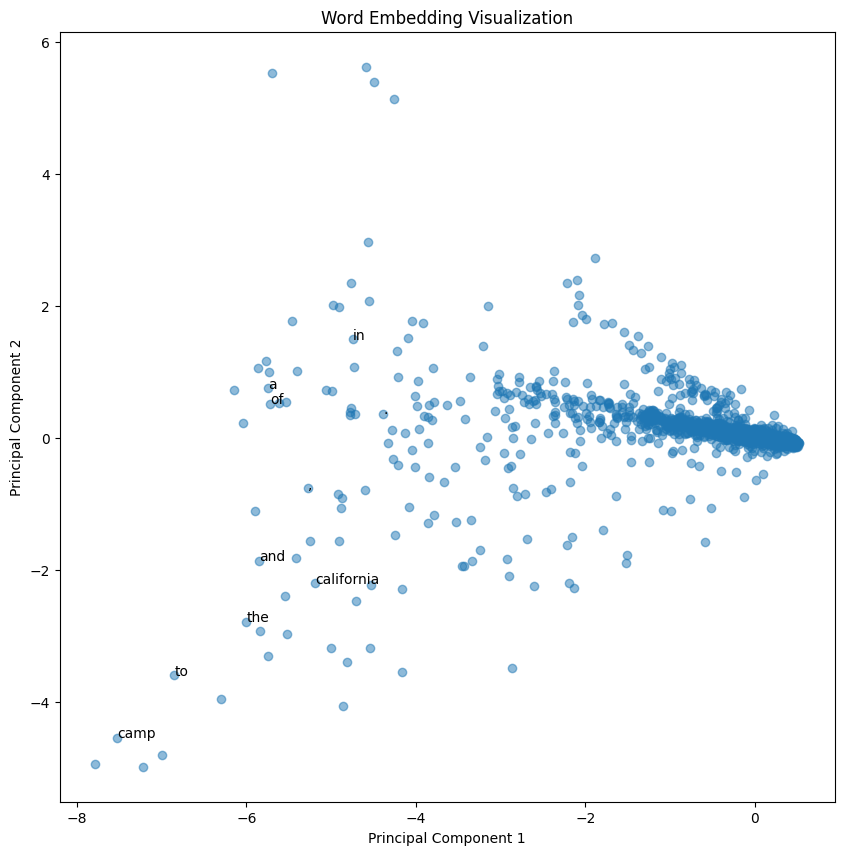

In [32]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


reviews_df = pd.read_csv('Narrators.csv')
# Handle missing values by replacing NaN with empty string
reviews_df['Description'] = reviews_df['Description'].fillna('')

def train_word2vec_model(texts, vector_size=300, window=5, min_count=1, workers=4):
    return Word2Vec(sentences=texts, vector_size=vector_size, window=window, min_count=min_count, workers=workers)

def visualize_word_embeddings(model, num_words_to_annotate=10):
    words, vectors = model.wv.index_to_key, model.wv.vectors
    vectors_pca = PCA(n_components=2).fit_transform(vectors)
    plt.figure(figsize=(10, 10))
    plt.scatter(vectors_pca[:, 0], vectors_pca[:, 1], alpha=0.5)
    for i, word in enumerate(words[:num_words_to_annotate]):
        plt.annotate(word, xy=(vectors_pca[i, 0], vectors_pca[i, 1]))
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Word Embedding Visualization')
    plt.show()

# Tokenize the data
tokenized_data = [word_tokenize(str(review).lower()) for review in reviews_df['Description']]
# Train Word2Vec model
word2vec_model = train_word2vec_model(tokenized_data)
# Visualize word embeddings
visualize_word_embeddings(word2vec_model)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Mukeshreddy3699/Mukesh_INFO5731/blob/main/Narrators.csv


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [32]:
# Type your answer
#initially i got errors and rectified by small changes but still it was a task to understand the nlp models #
